# HR Analytics

## Project Description

In our machine learning project, we aim to develop a predictive model for employee turnover within companies. Employee churn is a significant challenge that many organizations face, leading to increased recruitment costs, productivity losses, and disruptions in team dynamics (Society for Human Resource Management, 2019). On average, turnover costs companies between 50% to 200% of an employee's annual salary, including expenses for recruitment, training, and lost productivity (Boushey & Glynn, 2012).

The market for machine learning solutions in HR analytics and employee retention is substantial, with businesses across various industries seeking efficient ways to manage their workforce and minimize turnover. According to industry reports, the global market for HR analytics solutions is projected to reach $3.6 billion by 2025, driven by the increasing adoption of data-driven HR strategies (MarketsandMarkets, 2020).


## About the Dataset

The dataset consists of 15,000 samples and includes various attributes related to employee characteristics and work-related factors. Each sample represents an individual employee within an organization.

•	Satisfaction: Level of satisfaction reported by employees.

•	Evaluation: Performance evaluation scores assigned by managers.

•	Number of Projects: Total number of projects undertaken by each employee.

•	Average Monthly Hours Worked: Average number of hours worked per month.

•	Time Spent with Company (Years): Duration of employee tenure measured in years.

•	Work Accident: Indicates if an employee has been involved in a work-related accident (1 for yes, 0 for no).

•	Churn: Indicates if an employee has left the company (1 for yes, 0 for no).

•	Promotion: Indicates if an employee has received a promotion (1 for yes, 0 for no).

•	Department: Department or functional area where each employee is assigned.

•	Salary Level: Categorized as low, medium, or high.

The dataset provides valuable insights into employee satisfaction, performance evaluation, workload, tenure, safety incidents, turnover, promotion opportunities, departmental 

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

# Data Cleaning and Adjustment

In [4]:
df = pd.read_csv("C:/users/Jettawat/Downloads/employee.csv")

## Checking info for each feature

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Checking duplicated rows and elimate if any

In [16]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [14]:
df.drop_duplicates()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

## Checking missing values in the dataset

In [17]:
df.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

## Recode categorical variables

In [126]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# EDA

## Statistice summary for each variable in the dataset

In [129]:
df.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Correlation for numerical variables

C:\Users\Jettawat\AppData\Local\Temp\ipykernel_25816\1316311794.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


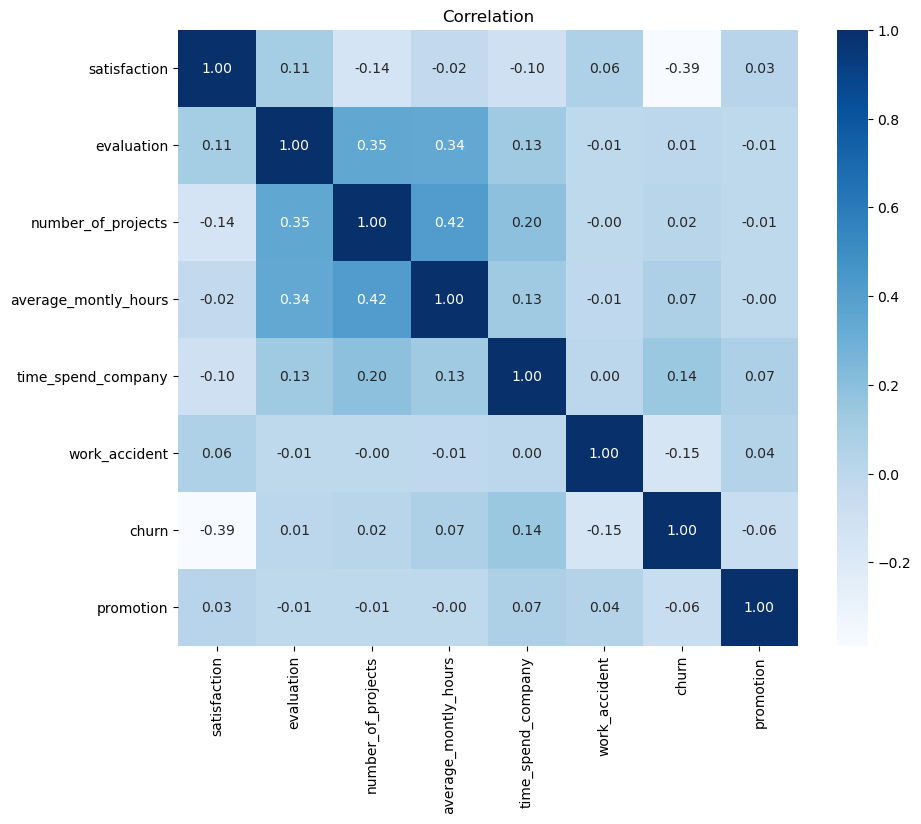

In [130]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation')
plt.show()

In [131]:
correlation_matrix 

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_of_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
churn,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


## Distribution between employee who did churn and who did not

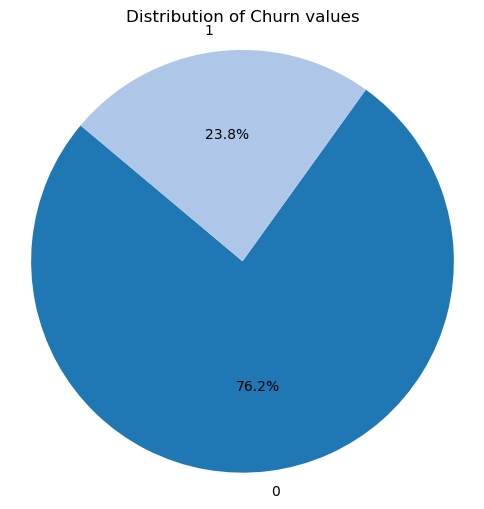

In [106]:
bk_counts = df['churn'].value_counts()
colors = ['#1f77b4', '#aec7e8']
plt.figure(figsize=(6, 6))  # Adjust the size of the pie chart
plt.pie(bk_counts, labels=bk_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Churn values')
plt.axis('equal')  

plt.show()

## Shape of data

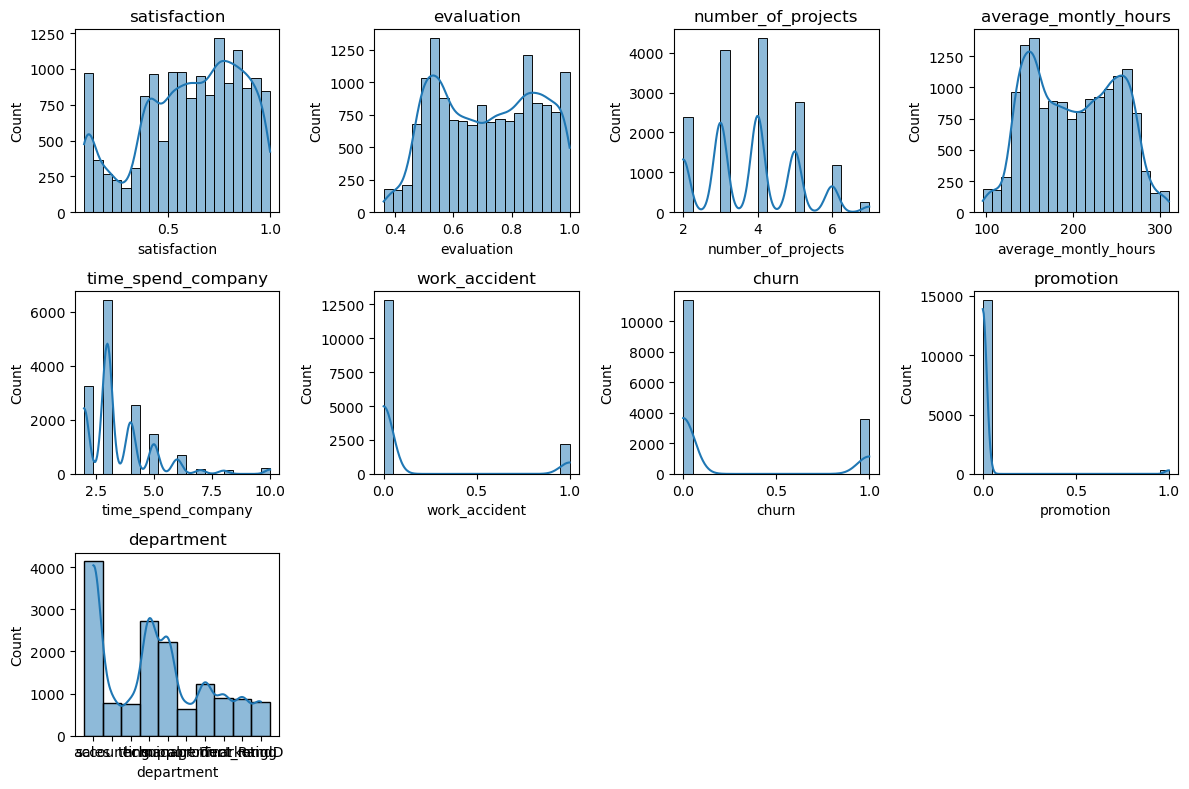

In [41]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Identify outliers

In [46]:
df_scale = df[['satisfaction', 'evaluation', 'number_of_projects', 'average_montly_hours', 'time_spend_company', 'work_accident']]

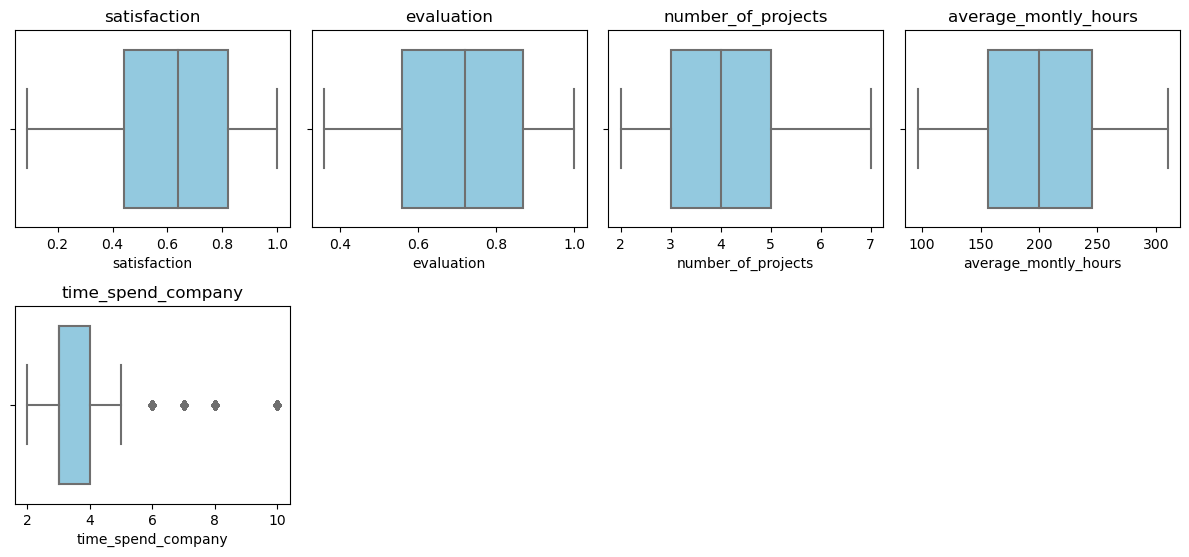

In [127]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_scale.columns[:-1]):  # Exclude the target column
    plt.subplot(3, 4, i+1)  # Adjust the subplot grid as per your preference
    sns.boxplot(x=df_scale[col], color='skyblue')  # Corrected 'boxplox' to 'boxplot', added 'x=' to specify the data
    plt.title(col)
plt.tight_layout()
plt.show()

## See the potential relationship between numerical features and the target variable.

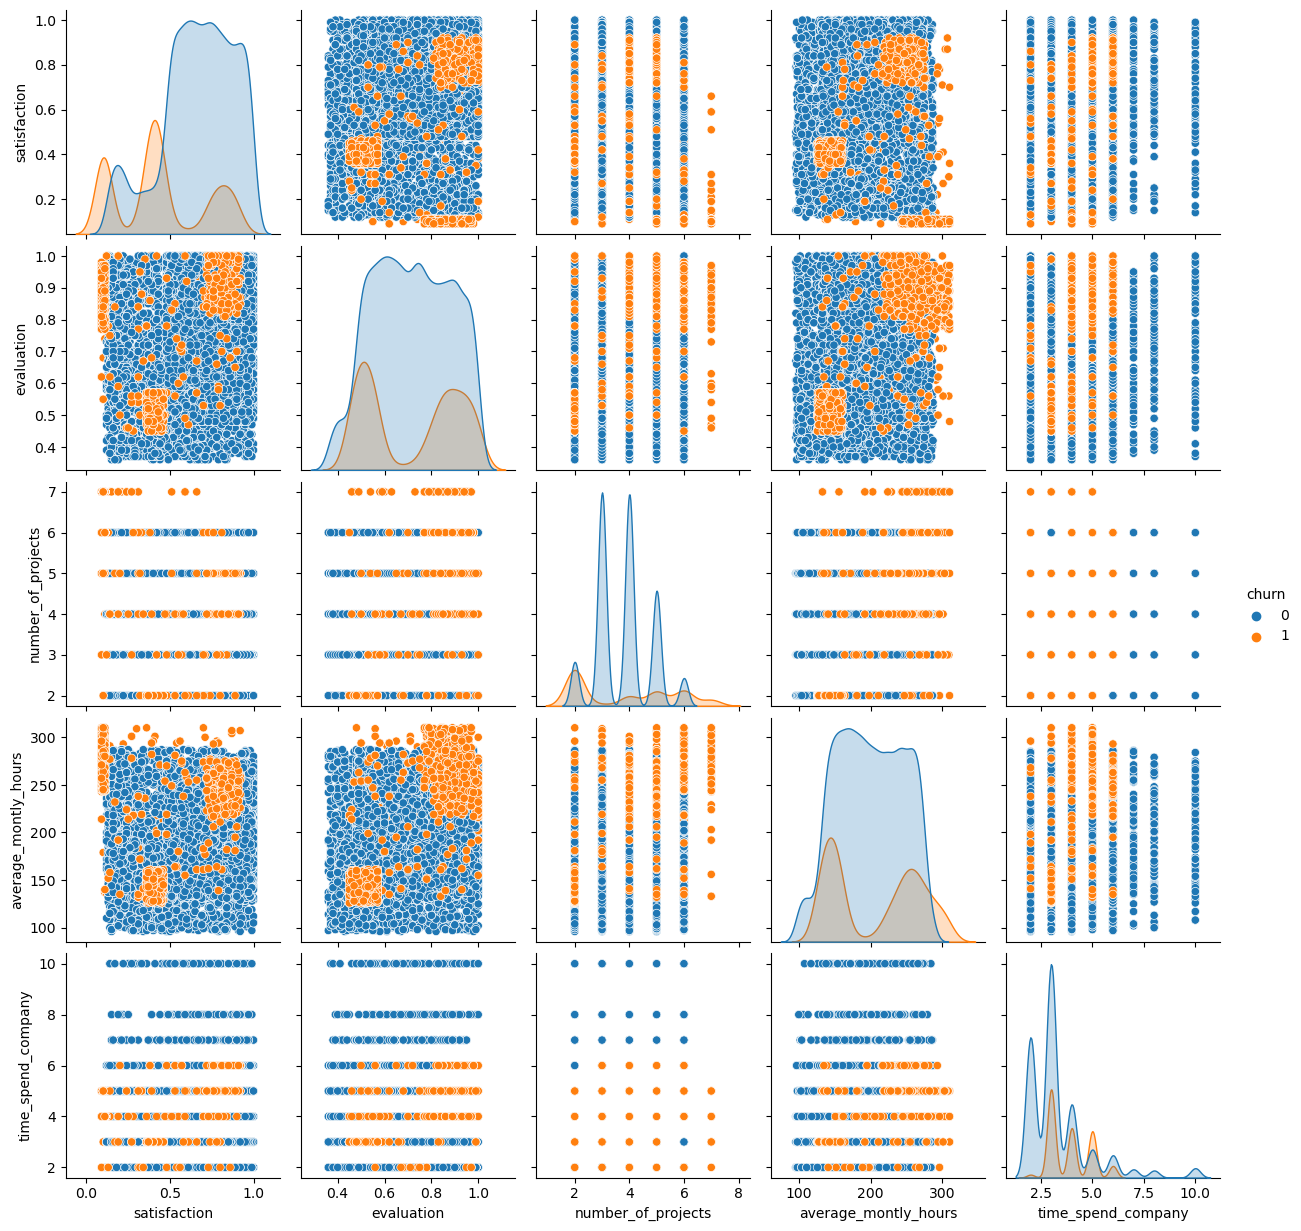

In [107]:
X=df_encoded.drop(columns=['churn'],axis=1)
y=df_encoded['churn']
sns.pairplot(df_encoded, hue='churn', vars = ['satisfaction', 'evaluation', 'number_of_projects', 'average_montly_hours','time_spend_company'])

## Model Development: Random Forest Classifier

## Split data into train and test set

In [48]:
from sklearn.model_selection import train_test_split

X_rf = df_encoded.drop('churn', axis=1) 
y_rf = df_encoded['churn']

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

## Processing data, hyper parmeters tuning using Gridsearch,and fit model

In [70]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the imbalanced-learn pipeline for Random Forest with StandardScaler
pipeline_rf = ImbPipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10]
}

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_rf_train, y_rf_train)

# Get best parameters and best model for Random Forest
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Predict and evaluate for Random Forest
y_rf_pred = best_model_rf.predict(X_rf_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Model Score for Random Forest:", best_model_rf.score(X_rf_test, y_rf_test))
print("Classification Report for Random Forest:")
print(classification_report(y_rf_test, y_rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rf_test, y_rf_pred))
print()

Best Hyperparameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best Model Score for Random Forest: 0.988
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
[[2284   10]
 [  26  680]]



# Feature Engineering: Random Forest Classifier

## Create a new feature by combing features to together

In [60]:
df_encoded['total_month_spend_company'] = df_encoded['time_spend_company'] * 12

In [64]:
df_encoded['total_hours_spend_company'] = df_encoded['total_month_spend_company'] * df_encoded['average_montly_hours']

In [65]:
df_encoded.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department_IT,department_RandD,...,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,total_month_spend_company,total_hours_spend_company
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,1,0,0,0,1,0,36,5652
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,1,0,0,0,0,1,72,18864
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,1,0,0,0,0,1,48,13056
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,1,0,0,0,1,0,60,13380
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,1,0,0,0,1,0,36,5724


In [66]:
from sklearn.model_selection import train_test_split

X_rf1 = df_encoded.drop('churn', axis=1) 
y_rf1 = df_encoded['churn']

X_rf1_train, X_rf1_test, y_rf1_train, y_rf1_test = train_test_split(X_rf1, y_rf1, test_size=0.2, random_state=42)

In [69]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the imbalanced-learn pipeline for Random Forest with StandardScaler
pipeline_rf1 = ImbPipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for Random Forest
param_grid_rf1 = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10]
}

# Perform GridSearchCV for Random Forest
grid_search_rf1 = GridSearchCV(estimator=pipeline_rf1, param_grid=param_grid_rf1, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search_rf1.fit(X_rf1_train, y_rf1_train)

# Get best parameters and best model for Random Forest
best_params_rf1 = grid_search_rf1.best_params_
best_model_rf1 = grid_search_rf1.best_estimator_

# Predict and evaluate for Random Forest
y_rf1_pred = best_model_rf1.predict(X_rf1_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Random Forest:", best_params_rf1)
print("Best Model Score for Random Forest:", best_model_rf1.score(X_rf1_test, y_rf1_test))
print("Classification Report for Random Forest:")
print(classification_report(y_rf1_test, y_rf1_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rf1_test, y_rf1_pred))
print()

Best Hyperparameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best Model Score for Random Forest: 0.9883333333333333
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
[[2286    8]
 [  27  679]]



# Model Development: Logistic Regression

## Split data into train and test set

In [72]:
from sklearn.model_selection import train_test_split

X_lr = df_encoded.drop('churn', axis=1) 
y_lr = df_encoded['churn']

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

## Processing data, hyper parmeters tuning using Gridsearch,and fit model

In [74]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define the imbalanced-learn pipeline for Logistic Regression with StandardScaler
pipeline_lr = ImbPipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, solver='lbfgs'))
])

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
}

# Perform GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search_lr.fit(X_lr_train, y_lr_train)

# Get best parameters and best model for Logistic Regression
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

# Predict and evaluate for Logistic Regression
y_lr_pred = best_model_lr.predict(X_lr_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Logistic Regression:", best_params_lr)
print("Best Model Score for Logistic Regression:", best_model_lr.score(X_lr_test, y_lr_test))
print("Classification Report for Logistic Regression:")
print(classification_report(y_lr_test, y_lr_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_lr_test, y_lr_pred))
print()

Best Hyperparameters for Logistic Regression: {'classifier__C': 10}
Best Model Score for Logistic Regression: 0.8196666666666667
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2294
           1       0.66      0.47      0.55       706

    accuracy                           0.82      3000
   macro avg       0.76      0.70      0.72      3000
weighted avg       0.81      0.82      0.81      3000

Confusion Matrix:
[[2125  169]
 [ 372  334]]



# Feature Reduction: Logistic Regression

It seems like having more features is not benefiting for Logistic Regression therefore, we will apply PCA to reduce the dimencion of our features

In [80]:
from sklearn.model_selection import train_test_split

X_lr1 = df_encoded.drop('churn', axis=1) 
y_lr1 = df_encoded['churn']

X_lr1_train, X_lr1_test, y_lr1_train, y_lr1_test = train_test_split(X_lr1, y_lr1, test_size=0.2, random_state=42)

## Apply PCA

In [86]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Define the imbalanced-learn pipeline for Logistic Regression with StandardScaler and PCA
pipeline_lr_pca = ImbPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),  # You can specify the number of components and other PCA parameters here
    ('classifier', LogisticRegression(random_state=42, solver='lbfgs'))
])

# Define the parameter grid for Logistic Regression with PCA
param_grid_lr_pca = {
    'pca__n_components': [18,20,22],  # Number of principal components to keep
    'classifier__C': [0.1, 1, 10],
}

# Perform GridSearchCV for Logistic Regression with PCA
grid_search_lr_pca = GridSearchCV(estimator=pipeline_lr_pca, param_grid=param_grid_lr_pca, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search_lr_pca.fit(X_lr1_train, y_lr1_train)

# Get best parameters and best model for Logistic Regression with PCA
best_params_lr_pca = grid_search_lr_pca.best_params_
best_model_lr_pca = grid_search_lr_pca.best_estimator_

# Predict and evaluate for Logistic Regression with PCA
y_lr1_pca_pred = best_model_lr_pca.predict(X_lr1_test)

# Print best hyperparameters and classification report for Logistic Regression with PCA
print("Best Hyperparameters for Logistic Regression with PCA:", best_params_lr_pca)
print("Best Model Score for Logistic Regression with PCA:", best_model_lr_pca.score(X_lr1_test, y_lr1_test))
print("Classification Report for Logistic Regression with PCA:")
print(classification_report(y_lr1_test, y_lr1_pca_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_lr1_test, y_lr1_pca_pred))
print()

Best Hyperparameters for Logistic Regression with PCA: {'classifier__C': 10, 'pca__n_components': 20}
Best Model Score for Logistic Regression with PCA: 0.8196666666666667
Classification Report for Logistic Regression with PCA:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2294
           1       0.66      0.47      0.55       706

    accuracy                           0.82      3000
   macro avg       0.76      0.70      0.72      3000
weighted avg       0.81      0.82      0.81      3000

Confusion Matrix:
[[2125  169]
 [ 372  334]]



## Plot out the coefficient of each feature

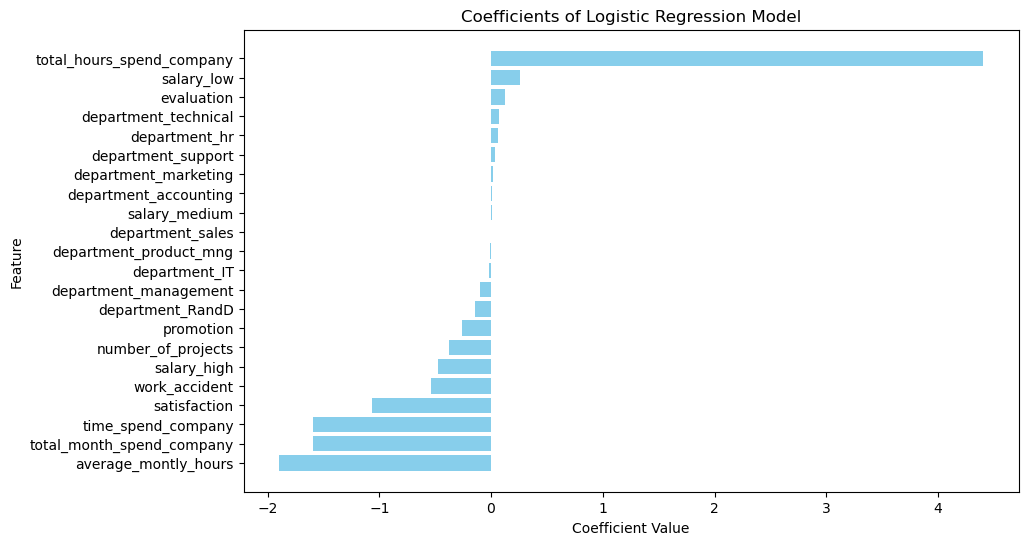

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming best_model_lr is your trained Logistic Regression model
coefficients = best_model_lr.named_steps['classifier'].coef_[0]
feature_names = X_lr_train.columns  # Assuming X_lr_train is your training data

# Sort coefficients and corresponding feature names
sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, color='skyblue')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

## Selecting features  based on their coefficinet values  

In [117]:
from sklearn.model_selection import train_test_split

X_lr2 = df_encoded[['total_hours_spend_company','salary_low','evaluation','promotion','number_of_projects',
                    'salary_high','work_accident','satisfaction','time_spend_company','total_month_spend_company',
                    'average_montly_hours',]]
y_lr2 = df_encoded['churn']

X_lr2_train, X_lr2_test, y_lr2_train, y_lr2_test = train_test_split(X_lr2, y_lr2, test_size=0.2, random_state=42)

In [138]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define the imbalanced-learn pipeline for Logistic Regression with StandardScaler
pipeline_lr2 = ImbPipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, solver='lbfgs'))
])

# Define the parameter grid for Logistic Regression
param_grid_lr2 = {
    'classifier__C': [0.1, 1, 10],
}

# Perform GridSearchCV for Logistic Regression
grid_search_lr2 = GridSearchCV(estimator=pipeline_lr2, param_grid=param_grid_lr2, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search_lr2.fit(X_lr2_train, y_lr2_train)

# Get best parameters and best model for Logistic Regression
best_params_lr2 = grid_search_lr2.best_params_
best_model_lr2 = grid_search_lr2.best_estimator_

# Predict and evaluate for Logistic Regression
y_lr2_pred = best_model_lr2.predict(X_lr2_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Logistic Regression:", best_params_lr2)
print("Best Model Score for Logistic Regression:", best_model_lr2.score(X_lr2_test, y_lr2_test))
print("Classification Report for Logistic Regression:")
print(classification_report(y_lr2_test, y_lr2_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_lr2_test, y_lr2_pred))
print()

Best Hyperparameters for Logistic Regression: {'classifier__C': 10}
Best Model Score for Logistic Regression: 0.82
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2294
           1       0.66      0.47      0.55       706

    accuracy                           0.82      3000
   macro avg       0.76      0.70      0.72      3000
weighted avg       0.81      0.82      0.81      3000

Confusion Matrix:
[[2125  169]
 [ 371  335]]



# Model Development: KNN Classifier

## Spliting data into train and test set

In [90]:
from sklearn.model_selection import train_test_split

X_knn = df_encoded.drop('churn', axis=1) 
y_knn = df_encoded['churn']

X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

## Processing data, hyper parmeters tuning using Gridsearch,and fit model


In [91]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the imbalanced-learn pipeline for KNN with StandardScaler
pipeline_knn = ImbPipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid for KNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'classifier__weights': ['uniform', 'distance']  # Weight function used in prediction
}

# Perform GridSearchCV for KNN
grid_search_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search_knn.fit(X_knn_train, y_knn_train)

# Get best parameters and best model for KNN
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

# Predict and evaluate for KNN
y_knn_pred = best_model_knn.predict(X_knn_test)

In [92]:
# Print best hyperparameters and classification report for KNN
print("Best Hyperparameters for KNN:", best_params_knn)
print("Best Model Score for KNN:", best_model_knn.score(X_knn_test, y_knn_test))
print("Classification Report for KNN:")
print(classification_report(y_knn_test, y_knn_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_knn_test, y_knn_pred))
print()

Best Hyperparameters for KNN: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Best Model Score for KNN: 0.9616666666666667
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2294
           1       0.88      0.96      0.92       706

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000

Confusion Matrix:
[[2205   89]
 [  26  680]]



# Feature Engineering using PCA: KNN Classifier

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the imbalanced-learn pipeline for KNN with StandardScaler and PCA
pipeline_knn_pca = ImbPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),  # You can specify the number of components and other PCA parameters here
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid for KNN with PCA
param_grid_knn_pca = {
    'pca__n_components': [14,16,18],  # Number of principal components to keep
    'classifier__n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'classifier__weights': ['uniform', 'distance']  # Weight function used in prediction
}

# Perform GridSearchCV for KNN with PCA
grid_search_knn_pca = GridSearchCV(estimator=pipeline_knn_pca, param_grid=param_grid_knn_pca, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search_knn_pca.fit(X_knn_train, y_knn_train)

# Get best parameters and best model for KNN with PCA
best_params_knn_pca = grid_search_knn_pca.best_params_
best_model_knn_pca = grid_search_knn_pca.best_estimator_

# Predict and evaluate for KNN with PCA
y_knn_pca_pred = best_model_knn_pca.predict(X_knn_test)

# Print best hyperparameters and classification report for KNN with PCA
print("Best Hyperparameters for KNN with PCA:", best_params_knn_pca)
print("Best Model Score for KNN with PCA:", best_model_knn_pca.score(X_knn_test, y_knn_test))
print("Classification Report for KNN with PCA:")
print(classification_report(y_knn_test, y_knn_pca_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_knn_test, y_knn_pca_pred))
print()

Best Hyperparameters for KNN with PCA: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance', 'pca__n_components': 16}
Best Model Score for KNN with PCA: 0.963
Classification Report for KNN with PCA:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2294
           1       0.89      0.96      0.92       706

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000

Confusion Matrix:
[[2210   84]
 [  27  679]]



# Result Summary

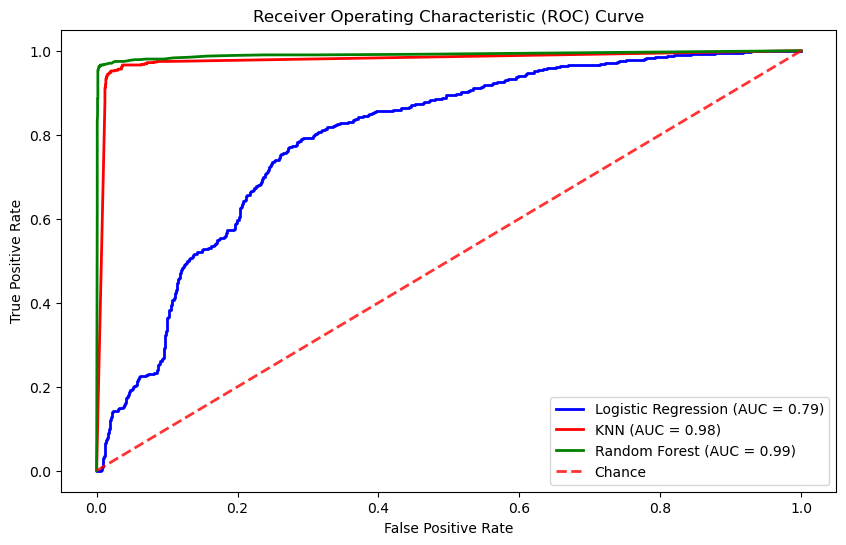

In [136]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each model
fpr_lr, tpr_lr, _ = roc_curve(y_lr2_test, best_model_lr2.predict_proba(X_lr2_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_knn_test, best_model_knn_pca.predict_proba(X_knn_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf1, tpr_rf1, _ = roc_curve(y_rf1_test, best_model_rf1.predict_proba(X_rf1_test)[:, 1])
roc_auc_rf1 = auc(fpr_rf1, tpr_rf1)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_rf1, tpr_rf1, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf1)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier 

In [110]:
# Print best hyperparameters and classification report
print("Best Hyperparameters for Random Forest:", best_params_rf1)
print("Best Model Score for Random Forest:", best_model_rf1.score(X_rf1_test, y_rf1_test))
print("Classification Report for Random Forest:")
print(classification_report(y_rf1_test, y_rf1_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rf1_test, y_rf1_pred))
print()

Best Hyperparameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best Model Score for Random Forest: 0.9883333333333333
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
[[2286    8]
 [  27  679]]



## Logistic Regression Classifier

In [139]:
# Print best hyperparameters and classification report
print("Best Hyperparameters for Logistic Regression:", best_params_lr2)
print("Best Model Score for Logistic Regression:", best_model_lr2.score(X_lr2_test, y_lr2_test))
print("Classification Report for Logistic Regression:")
print(classification_report(y_lr2_test, y_lr2_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_lr2_test, y_lr2_pred))
print()

Best Hyperparameters for Logistic Regression: {'classifier__C': 10}
Best Model Score for Logistic Regression: 0.82
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2294
           1       0.66      0.47      0.55       706

    accuracy                           0.82      3000
   macro avg       0.76      0.70      0.72      3000
weighted avg       0.81      0.82      0.81      3000

Confusion Matrix:
[[2125  169]
 [ 371  335]]



## KNN Classifier

In [112]:
# Print best hyperparameters and classification report for KNN with PCA
print("Best Hyperparameters for KNN with PCA:", best_params_knn_pca)
print("Best Model Score for KNN with PCA:", best_model_knn_pca.score(X_knn_test, y_knn_test))
print("Classification Report for KNN with PCA:")
print(classification_report(y_knn_test, y_knn_pca_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_knn_test, y_knn_pca_pred))
print()

Best Hyperparameters for KNN with PCA: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance', 'pca__n_components': 16}
Best Model Score for KNN with PCA: 0.963
Classification Report for KNN with PCA:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2294
           1       0.89      0.96      0.92       706

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000

Confusion Matrix:
[[2210   84]
 [  27  679]]

